# 線形回帰

この章では、前章の単回帰を拡張した線形回帰について解説する。

最も単純な線形回帰は、以下の多項式回帰である。

`````{admonition} 定義: 多項式回帰
:class: tip

回帰曲線を、多項式の重み付き和で表現する回帰を**多項式回帰**(polynomial regression)と呼ぶ。

$$
y(\boldsymbol{x}, \boldsymbol{w}) = w_0 + w_1 x + w_2 x^2 + \cdots + w_M x^M = \sum_{j=0}^M w_j x^j
$$

ここで、$x$は入力変数、$y$は出力変数、$w$はパラメータ、$M$は多項式の次数である。

`````

線形回帰(Linear Regression)はしばし、この多項式回帰を指すこともあるが、
より一般には、基底関数と呼ばれる関数を用いた定義となる:

`````{admonition} 定義: 線形回帰
:class: tip

$$
y({\bf x},{\bf w})= \sum^{M-1}_{j=0} w_j \phi_j({\bf x}) = {\bf w}^T\boldsymbol{\phi}({\bf x})
$$

ここで、$\boldsymbol{\phi}({\bf x})$は**基底関数**と呼ばれる。
"線形"の意味するところは、基底関数の形状が線形であることではなく、基底関数を重ね合わせるパラメータ(重み)$w$それぞれについて、1次式で表されることを指す。

`````

上記の基底関数としては、ガウス型基底関数、シグモイド基底関数、スプライン基底関数、フーリエ基底関数などがある。
**「幾つかの関数を重みをつけて重ね合わせることで、データをうまく表現するような柔軟な関数を作る」** というイメージを持つと良い。

## 線形回帰の一般的な性質

線形回帰モデル:$y({\bf x},{\bf w})= \sum^{M-1}_{j=0} w_j \phi_j({\bf x}) = {\bf w}^T\boldsymbol{\phi}({\bf x})$を考える。

ここで$\boldsymbol{\phi}$は基底関数のベクトルで、$p$次の多項式回帰の場合は$\boldsymbol{\phi}=(1, x, x^2, \ldots, x^p)$となる。実際に、ベクトルの内積の形で書き下すと${\bf w}^T\boldsymbol{\phi}=w_0 + w_1x+ w_2x^2+ \cdots + w_{p}x^p$となり、$p$次多項式になっている。


さて目標変数$t$が、決定論的な関数$y({\bf x},{\bf w})$と平均0,精度$\beta\equiv 1/\sigma^2$の誤差$\epsilon$の和:  $t=y({\bf x},{\bf w})+\epsilon$で与えられていると仮定(≒モデル化)する。

つまり、$t$の確率分布が$p(t|{\bf x},{\bf w},\beta) = \mathcal{N}(t|y({\bf x},{\bf w}),\beta^{-1})$で与えられるとする。
$\mathcal{N}(x|\mu,\Sigma)$は平均ベクトルが$\mu$、共分散行列が$\Sigma$の多変量正規分布を表す。

いまデータ点が$N$個あるとする。入力$\boldsymbol{\mathrm{X}}=\{{\bf x_1},{\bf x_2},\ldots, {\bf x_N}\}$と、対応する目標値を$\boldsymbol{\mathrm{t}}=\{t_1,t_2,\ldots, t_N\}$と表すことにしておこう。

これらのデータ点が上の分布$p(t|{\bf x},{\bf w},\beta)$から独立に生成されたと仮定すると、データの目標変数についての確率分布は

$$
p(\boldsymbol{\mathrm{t}}|\boldsymbol{\mathrm{X}},{\bf w},\beta) = \prod^N_{n=1} \mathcal{N}(t_n|{\bf w}^T \boldsymbol{\phi}({\bf x_n}) ,\beta^{-1})
$$

で与えられる。つまり、(少々くどいが)$t$の各点が$y({\bf x},{\bf w})$の周りに、精度$\beta$のガウス分布でばらついているということである。

(以下では、確率分布の条件部分にある${\bf x}$などを適宜省略する)
このとき、**対数尤度**と呼ばれる量は

$$
\ln p(\boldsymbol{\mathrm{t}}|{\bf w},\beta) = \sum^N_{n=1} \ln \mathcal{N}(t_n|{\bf w}^T\boldsymbol{\phi}({\bf x_n}),
\beta^{-1}) = \frac{N}{2}\ln\beta - \frac{N}{2}\ln(2\pi) -\beta E_D({\bf w})
$$

となる。なお$E_D$は二乗和誤差: 

$$
E_D({\bf w}) \equiv \frac{1}{2}\sum^N_{n=1} \left( t_n- {\bf w}^T \boldsymbol{\phi}({\bf x_n})  \right)^2
$$

で、前の2つの項はモデルパラメータ${\bf w}$に依存しないことから、**対数尤度の最大化**が、**二乗和誤差の最小化と等価**であることがわかる。

対数尤度の勾配を書き下し、勾配を用いて対数尤度の最大化(**最尤推定**と呼ぶ)を考えよう。つまり

$$
\nabla_\mathbf{w} \ln p(\boldsymbol{\mathrm{t}}|{\bf w},\beta) = \beta \sum^N_{n=1} \left( t_n -{\bf w}^T \boldsymbol{\phi}({\bf x_n}) \right) \boldsymbol{\phi}({\bf x_n})^T =0
$$

の根を求めてやれば良い。

上の式を変形すると

$$
\sum^N_{n=1} t_n \boldsymbol{\phi}({\bf x_n})^T = \sum^N_{n=1} {\bf w}^T \boldsymbol{\phi}({\bf x_n}) \boldsymbol{\phi}({\bf x_n})^T
$$

となり、これを${\bf w}$について解くことで、

$$
{\bf w} = ( \boldsymbol{\Phi}^T\boldsymbol{\Phi}  )^{-1} \boldsymbol{\Phi}^T \boldsymbol{\mathrm{t}}
$$

が根であることがわかる。ここで、$\boldsymbol{\Phi}$は計画行列(Design Matrix)と呼ばれ、$\boldsymbol{\Phi}_{nj} = \phi_j({\bf x_n})$で与えられる。


つまり、**最尤推定を与えるパラメータ${\bf w}_{ML}$は、計画行列$\boldsymbol{\Phi}$を用いて閉じた形で与えられる**。この点が最も重要である。


---

上の式を用いて、最尤推定を与えるパラメータ${\bf w}_{ML}$を求める関数を実装してみよう。

次の１次元擬似データの回帰を考えてみる。

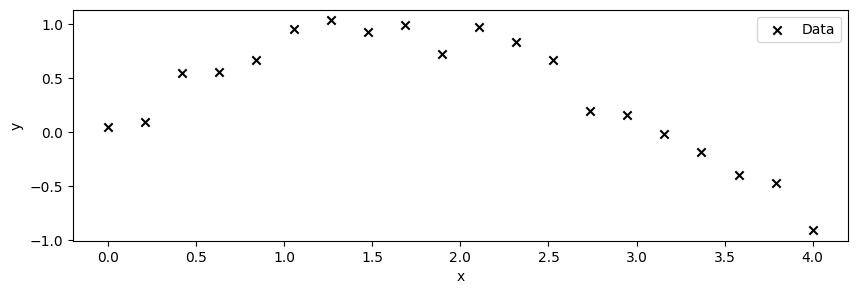

In [7]:
import numpy as np
from matplotlib import pyplot as plt

## データ点の生成
np.random.seed(1234)
x = np.linspace(-2.0, 6.0,1000)
beta = 1.e+2
xt = np.linspace(0.0,4.0,20)
yt = np.sin(xt) + np.array([ np.random.normal(0.0,1.0/np.sqrt(beta)) for i in range(len(xt))])

fig = plt.figure(figsize = (10,3))
axs = [fig.add_subplot(111)]
axs[0].scatter(xt,yt,label="Data",color="k",marker="x")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].legend()
plt.show()
plt.close() 

これを,numpyモジュールの多項式fit関数と、上の計画行列によって3次式で回帰してみると...

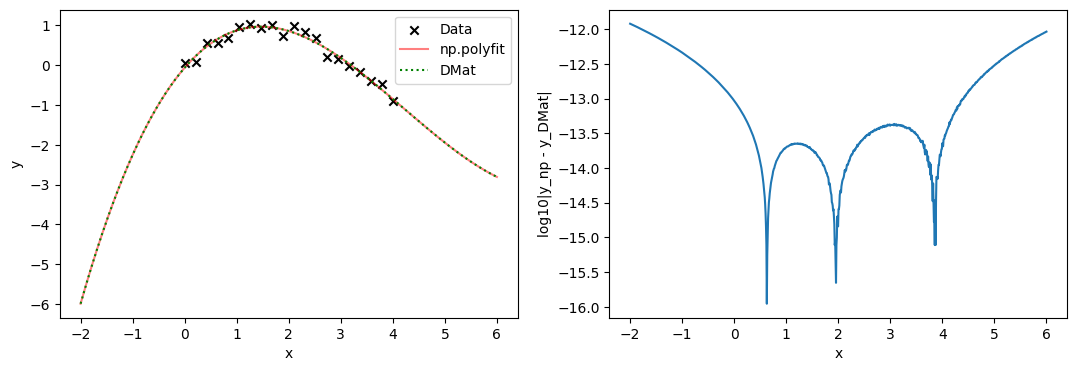

In [8]:
N = len(xt)

##　多項式の次元を固定しておく
p=3

##numpyのfit
yp = np.poly1d(np.polyfit(xt, yt, p))(x) 

## 計画行列を用いる方法
def phi(x,p):
    return np.array([ x**i for i in range(p+1)])
Phi = np.zeros((N,p+1))
for i in range(N):
    xn = xt[i]
    tmp = phi(xn,p) 
    for j in range(p+1):
        Phi[i][j] = tmp[j]
S = np.linalg.inv(np.dot(Phi.T,Phi))
wML = np.dot(S,np.dot(Phi.T,yt))
yD = [ np.dot(wML,phi(xn,p)) for xn in x ]

#図のplot
fig = plt.figure(figsize = (13,4))
axs = [fig.add_subplot(121),fig.add_subplot(122)]
axs[0].scatter(xt,yt,label="Data",color="k",marker="x")
axs[0].plot(x,yp,label="np.polyfit",color="r",alpha=0.5)
axs[0].plot(x,yD,label="DMat",linestyle="dotted", color="g")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].legend()

axs[1].plot(x,np.log10(abs(yp-yD)))
axs[1].set_xlabel("x")
axs[1].set_ylabel("log10|y_np - y_DMat|")
plt.show()
plt.close() 

となり、ライブラリの出力と計画行列を用いた最尤推定の結果とがピッタリ(ざっくり14桁程度)一致していることがわかる。

### $\clubsuit$ L2正則化項がある場合への拡張


詳しくはニューラルネットワークや正則化の章で解説するが、一般に回帰問題においては、与えられたデータに対する過度な適合(過適合)とそれによる汎化性能(予測性能)の低下を防ぐために、正則化と呼ばれる手法が用いられる。今の場合も、データは背後にある関数にノイズを足して生成されているが、そのノイズを含んだデータに対して、完全に適合するようなモデルを作ると、ノイズまで含んだ関数を作ってしまうことになる。これは多くの場合、望ましくない。

正則化とは、モデルの複雑さを制限することで、過適合を防ぐ手法である。
なかでも、L2正則化は、パラメータの二乗和を小さくするように、最尤推定を行う手法であり、機械学習を始めとする多くの分野で用いられている。

今まで、モデルとなる関数の良さを測る際は、二乗和誤差関数を用いていたが、これにL2正則化項と呼ばれる重みの二乗和を加えたものを用いる。

$$
\mathcal{L}(\mathbf{w}, \lambda) \equiv  \frac{1}{2}\sum^N_{n=1} \left( t_n- {\bf w}^T \boldsymbol{\phi}({\bf x_n})  \right)^2 + \frac{\lambda}{2} {\bf w}^T{\bf w}
$$

第二項がL2正則化項で、重みが大きければ大きいほど、対数尤度が小さく(誤差関数$\mathcal{L}$の値が大きく)なってしまうような尺度になっていることがわかる。
ここで、$\lambda$は正則化の強さを決めるパラメータで、$\lambda$が大きいほど、正則化の制限の強さが増す。

この式について、上と同様に勾配を計算し、しばらく計算してやると、最尤推定を与えるパラメータ${\bf w}$は

$$
{\bf w}_{ML,L2} = (\lambda I + \boldsymbol{\Phi}^T\boldsymbol{\Phi}  )^{-1} \boldsymbol{\Phi}^T \boldsymbol{\mathrm{t}}
$$  

となり、計画行列に$\lambda \times$(単位行列)を足した形となる。

対数尤度が$|w|^2$に比例することから実はほとんど自明なのだが、あとで示すように「L2正則化を課すこと」は、
「パラメータの事前分布にガウス分布を仮定すること」と等価である。


### データの規模に関する注意点

上では、線形回帰の最適なパラメータは閉じた形で求められることを紹介した。

これは、最適解を得る指針が明確であるというメリットの反面、データのサイズが大きくなるにつれてデメリットが生じる。

まずデータ数$N$が大きくなれば、数値計算上のボトルネックは行列に対する演算となる。
例えば$N=10^6$とすると、正方行列の行列要素を倍精度(Float64)の浮動小数点で保持しようとすると、
変数だけで$(10^6)^2 \times 8 = 8 \times 10^{12}$バイトとなり、約8TBとなる。
これは、明らかに一般的なPCのメモリや記憶容量のサイズを超えている。

また、一般に主要な行列演算は、計算量が$O(N^2)$や$O(N^3)$となるため、データ数が大きくなると、計算量が膨大になり現実的な時間で計算が終わらなくなる。

このような理由から、データ数が大きくなると、線形回帰のような閉じた形で解けるモデルでも、
逐次パラメータを更新し、最適解を探索するような手法が必要となる。

機械学習のパラメータ最適化などは、このような逐次的な手法が用いられることが多く、詳しくは後の章で説明する。




## ベイズ線形回帰

次に、パラメータ${\bf w}$をベイズ的に取り扱う事を考える。
このノートでいう"ベイズ的"とはせいぜい「パラメータを点推定する立場より有限の幅をもつ確率分布としてパラメータを考える」という程度の意味である。  

パラメータ${\bf w}$が、平均$\boldsymbol{\mu}$,共分散$\boldsymbol{\Sigma}$で指定される多次元の正規分布に従うと仮定する:

$$
{\bf w} \sim \mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma})
$$

このとき、データ点$t$が観測されたときのパラメータの事後分布は$p({\bf w}|\boldsymbol{\mathcal{t}}) = \mathcal{N}(\tilde{\boldsymbol{\mu}},\tilde{\boldsymbol{\Sigma}})$で与えられる。

ここで事後分布の平均および共分散は以下のとおりである:

$$
\begin{align*}
\tilde{\boldsymbol{\Sigma}}^{-1} & =\boldsymbol{\Sigma}^{-1}+\beta\boldsymbol{\Phi}^T \boldsymbol{\Phi}, \\
\tilde{\boldsymbol{\mu} } & = \tilde{\boldsymbol{\Sigma}} (\boldsymbol{\Sigma} \boldsymbol{\mu} + \beta \boldsymbol{\Phi}^T \boldsymbol{\mathcal{t}})
\end{align*}
$$

ここで簡単のため事前分布をさらに簡略化しよう。

事前分布の平均$\boldsymbol{\mu}$が$0$(ベクトル)かつ、パラメータの事前分布の共分散が対角的(独立な分散をもつ)でなおかつ値が同じ,つまり、上の$\boldsymbol{\Sigma}=\alpha^{-1}I$とかける場合を考える。

このとき、事後分布の平均および共分散は以下のように簡略化される:  
$\tilde{\boldsymbol{\Sigma}}^{-1} =\alpha I +\beta\boldsymbol{\Phi}^T \boldsymbol{\Phi},
\hspace{0.5cm} \tilde{\boldsymbol{\mu}}=  \beta \tilde{\boldsymbol{\Sigma}} \boldsymbol{\Phi}^T \boldsymbol{\mathcal{t}}$

この条件のもとで対数事後確率(log posterior)と呼ばれる量は、

$$
\ln p({\bf w}|\boldsymbol{\mathrm{t}}) = -\frac{\beta}{2}\sum^N_{n=1} \left(t_n - {\bf w}^T \phi(x_n) \right)^2 -\frac{\alpha}{2} {\bf w}^T{\bf w} +  \text{const.}
$$

となる。


右辺の2項は、二乗誤差とL2正則化項に対応していることがわかる(最後の項は定数なので最大化/最小化とは関係ない)。したがって、正規分布で与えられる事前分布のもとでパラメータ${\bf w}$の事後分布を最大化することは、L2正則化項がある場合の誤差関数の最小化と($\lambda=\beta/\alpha$とすれば)等価であることがわかる。




:::{margin}
**性質の良い**とは、**共役事前分布**と呼ばれるように、事後分布が同じ形の確率分布になるような事前分布のことである。
:::
実用上は${\bf w}$の分布を考えたあと、それを予測値の分布として伝播させる必要がある。
一般に予測分布を評価する際は、サンプリング法などが必要になるが、ガウス分布などの**性質の良い**確率分布を用いる場合は、事後分布が閉じた形で書き下すことができる(今の場合、ガウス分布となる)ため、事後分布に従う乱数などの生成は比較的容易となる。

未知の点$x^*$での値を$t^*$と書くことにすると、

$$
p(t^*|\boldsymbol{\mathrm{t}},\alpha,\beta) =
\int p(t|{\bf w},\beta) p({\bf w}|\boldsymbol{\mathrm{t}},\alpha,\beta) d{\bf w}
$$

今の場合、ガウス分布の性質から、予測分布は以下で与えられる

$$
p(t^*|{\bf x},\boldsymbol{\mathrm{t}},\alpha,\beta) = \mathcal{N}(t^*|\tilde{\boldsymbol{\mu}}^T\boldsymbol{\phi}({\bf x}),\sigma^2_N({\bf x}))
$$

ここで、予測分布の分散は

$$
\sigma^2_N({\bf x})= \frac{1}{\beta}+\boldsymbol{\phi}({\bf x})^T \tilde{\boldsymbol{\Sigma}}\boldsymbol{\phi}({\bf x}) 
$$



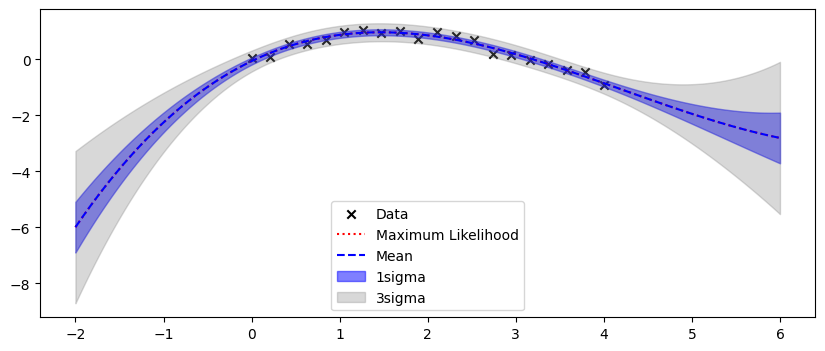

In [9]:
## alpha(事前分布の精度=分散の逆数)は決め打ちとする
alpha = 1.e-5 #精度が小さい=分散が大きい=パラメータの事前知識が"弱い"

## wの事後分布の計算
I = np.diag([1.0 for i in range(p+1)])
Sigma = np.linalg.inv( alpha * I + beta * np.dot(Phi.T, Phi) )
mu = beta * np.dot(Sigma, np.dot(Phi.T,yt))

## 予測値(その分散)のリストを作成
y_BLR = []
for tx in x :
    tmp = phi(tx,p)
    mu_p = np.dot(mu,tmp)    
    term1 = 1.0/beta
    term2 =  np.dot(tmp,np.dot(Sigma,tmp))
    sigma_p = term1 + term2 
    #print("term1", term1, "term2", term2)
    y_BLR += [ [mu_p, sigma_p] ]
y_BLR = np.array(y_BLR).T

## plot
fig = plt.figure(figsize = (10,4))
axs = [fig.add_subplot(111)]
axs[0].scatter(xt,yt,label="Data",color="k",marker="x")
axs[0].plot(x,yD,label="Maximum Likelihood",linestyle="dotted", color="red")
axs[0].plot(x,y_BLR[0],label="Mean",linestyle="dashed", color="blue")
axs[0].fill_between(x,y_BLR[0]+np.sqrt(y_BLR[1]),y_BLR[0]-np.sqrt(y_BLR[1]),label="1sigma", color="blue",alpha=0.5)
axs[0].fill_between(x,y_BLR[0]+3*np.sqrt(y_BLR[1]),y_BLR[0]-3*np.sqrt(y_BLR[1]),label="3sigma", color="gray",alpha=0.3)
axs[0].legend()
plt.show()
plt.close() 

パラメータの広がりが予測に伝搬され、データが無いところで予測が不確かになっていることが見て取れる。


注) 上では、データの精度$\beta$(分散の逆数)や、パラメータ${\bf w}$の精度$\alpha$を既知としたが、実際には、$\beta$そのものがわからなかったりする。